In [61]:
import pandas as pd
import io
import requests


def get_data(url):
    s=requests.get(url).content
    return pd.read_csv(io.StringIO(s.decode('utf-8')))



In [62]:
case_time_series = get_data('https://api.covid19india.org/csv/latest/case_time_series.csv')

In [63]:
case_time_series.tail()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
112,21 May,6023,118223,3131,48553,148,3583
113,22 May,6536,124759,3280,51833,142,3725
114,23 May,6665,131422,2576,54409,142,3867
115,24 May,7111,138535,3285,57694,156,4023
116,25 May,6414,144949,3012,60706,150,4173


In [64]:
df=case_time_series[['Date','Total Confirmed']]

In [65]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [67]:
from datetime import datetime
datetime_object = datetime.strptime('30 January', '%d %B')

In [68]:
daterange=[]
for i in df.Date:
    i=i+'2020'
    datetime_object = datetime.strptime(i, '%d %B %Y')
    daterange.append(datetime_object) #.strftime("%Y-%m-%d")
    

In [69]:
daterange

[datetime.datetime(2020, 1, 30, 0, 0),
 datetime.datetime(2020, 1, 31, 0, 0),
 datetime.datetime(2020, 2, 1, 0, 0),
 datetime.datetime(2020, 2, 2, 0, 0),
 datetime.datetime(2020, 2, 3, 0, 0),
 datetime.datetime(2020, 2, 4, 0, 0),
 datetime.datetime(2020, 2, 5, 0, 0),
 datetime.datetime(2020, 2, 6, 0, 0),
 datetime.datetime(2020, 2, 7, 0, 0),
 datetime.datetime(2020, 2, 8, 0, 0),
 datetime.datetime(2020, 2, 9, 0, 0),
 datetime.datetime(2020, 2, 10, 0, 0),
 datetime.datetime(2020, 2, 11, 0, 0),
 datetime.datetime(2020, 2, 12, 0, 0),
 datetime.datetime(2020, 2, 13, 0, 0),
 datetime.datetime(2020, 2, 14, 0, 0),
 datetime.datetime(2020, 2, 15, 0, 0),
 datetime.datetime(2020, 2, 16, 0, 0),
 datetime.datetime(2020, 2, 17, 0, 0),
 datetime.datetime(2020, 2, 18, 0, 0),
 datetime.datetime(2020, 2, 19, 0, 0),
 datetime.datetime(2020, 2, 20, 0, 0),
 datetime.datetime(2020, 2, 21, 0, 0),
 datetime.datetime(2020, 2, 22, 0, 0),
 datetime.datetime(2020, 2, 23, 0, 0),
 datetime.datetime(2020, 2, 24, 0,

In [70]:
s=list(df['Total Confirmed'])

In [71]:
len(daterange)

117

In [38]:
result = adfuller(s)

In [39]:
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -1.632138582011589
p-value: 0.4663714932537098
Critical Values:
	1%: -3.4954932834550623
	5%: -2.8900369024285117
	10%: -2.5819706975209726


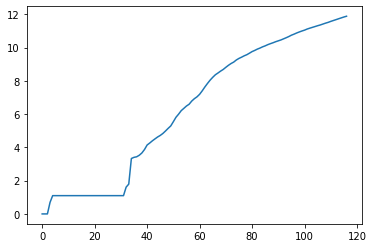

In [40]:
df_log = np.log(s)
plt.plot(df_log)

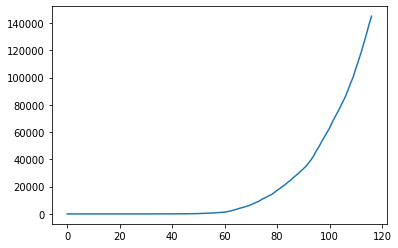

In [41]:
plt.plot(s)

In [42]:
decomposition = seasonal_decompose(df_log) 
model = ARIMA(df_log, order=(2,1,2))
results = model.fit(disp=-1)
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

In [72]:
df=pd.DataFrame(s, index =daterange, columns =['Cases'])

In [73]:
df.head()

,Cases
2020-01-30,1
2020-01-31,1
2020-02-01,1
2020-02-02,2
2020-02-03,3


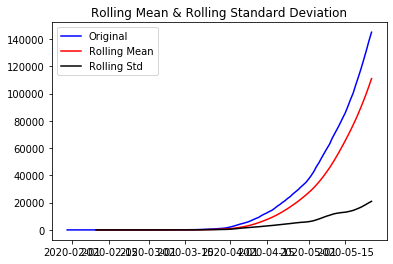

In [79]:
rolling_mean = df.rolling(window = 12).mean()
rolling_std = df.rolling(window = 12).std()
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

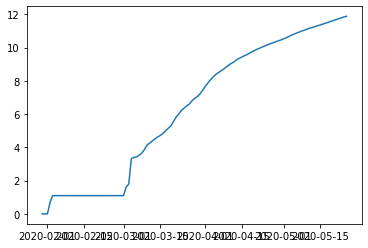

In [80]:
df_log = np.log(df)
plt.plot(df_log)

In [81]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['Cases'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

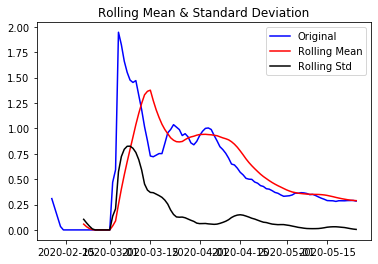

ADF Statistic: -2.6066012691084817
p-value: 0.09164058037075723
Critical Values:
	1%: -3.4954932834550623
	5%: -2.8900369024285117
	10%: -2.5819706975209726


In [82]:
rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

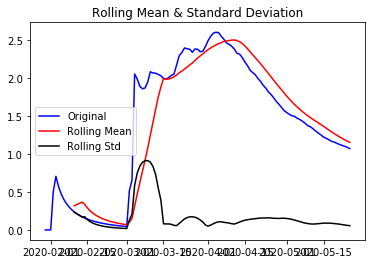

ADF Statistic: -1.8107657530589232
p-value: 0.3751300470531914
Critical Values:
	1%: -3.489057523907491
	5%: -2.887246327182993
	10%: -2.5804808802708528


In [83]:
rolling_mean_exp_decay = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)

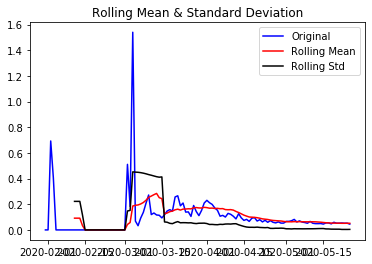

ADF Statistic: -5.567453794715336
p-value: 1.4935288148849653e-06
Critical Values:
	1%: -3.489057523907491
	5%: -2.887246327182993
	10%: -2.5804808802708528


In [84]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

In [85]:
seasonal_decompose(df['Cases'],model ='multiplicative') 

c:\users\bharg\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\bharg\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\bharg\appdata\local\programs\python\python36\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


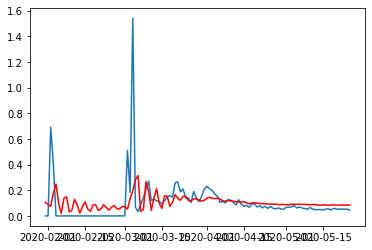

In [92]:
model = ARIMA(df_log, order=(3,1,3))
results = model.fit(disp=-1)
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')

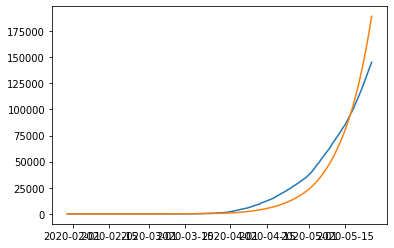

In [93]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log['Cases'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df)
plt.plot(predictions_ARIMA)